In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.compat import lzip
from scipy.stats import chi2
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

In [58]:
df = pd.read_csv('dataset.csv')

In [59]:
print(df.columns)

Index(['My age', 'My highest education',
       'In my function I carry managerial responsibility (executive, end responsible, partner)',
       'My enterprise is active in the following branche/industry',
       'Please indicate your company`s age in years',
       'How many FTE are in your organization?',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'How much time do you spend on average per day working with data in your current role?',
       'Your primary involvement with data is in entering data',
       'Your primary involvement with data is in preparing visualizations',
       'Your primary/major involvement with data is in understanding what happened in past or what is happening',
       'Your primary/major involvement with data is in using data to predict what may happen',
       'My organization has central warehouse to store all data',
       'My organization has one point of contact for all database related queries',
       'My organizati

In [60]:
# Define the encoding dictionary
sector_encoding = {
    1: 'Agriculture',
    8: 'Mining',
    10: 'Manufacturing',
    11: 'Manufacturing',
    13: 'Manufacturing',
    14: 'Manufacturing',
    16: 'Manufacturing',
    17: 'Manufacturing',
    18: 'Manufacturing',
    20: 'Manufacturing',
    21: 'Manufacturing',
    22: 'Manufacturing',
    23: 'Manufacturing',
    24: 'Manufacturing',
    25: 'Manufacturing',
    26: 'Manufacturing',
    27: 'Manufacturing',
    28: 'Manufacturing',
    29: 'Manufacturing',
    30: 'Manufacturing',
    31: 'Manufacturing',
    32: 'Manufacturing',
    35: 'Electricity',
    36: 'Water_supply',
    38: 'Water_supply',
    41: 'Construction',
    42: 'Construction',
    43: 'Construction',
    45: 'Wholesale_retail',
    46: 'Wholesale_retail',
    47: 'Wholesale_retail',
    49: 'Transportation_storage',
    52: 'Transportation_storage',
    55: 'Accommodation',
    56: 'Accommodation',
    58: 'IT',
    61: 'IT',
    62: 'IT',
    63: 'IT',
    64: 'Finance',
    66: 'Finance',
    68: 'Real_estate',
    69: 'Consultancy',
    70: 'Consultancy',
    71: 'Consultancy',
    73: 'Consultancy',
    77: 'Renting',
    81: 'Renting',
    82: 'Renting',
    84: 'Public_administration',
    85: 'Public_administration',
    86: 'Healthcare',
    87: 'Healthcare',
    88: 'Healthcare',
    90: 'Culture',
    91: 'Culture',
    93: 'Culture',
    94: 'Other',
    96: 'Other'
}

# Add the 'sector' column based on the encoding
df['sector_new'] = df['My enterprise is active in the following branche/industry'].map(sector_encoding)

In [61]:
# Calculate summary statistics for 'My age'
age_stats = df['My age'].describe()

# Calculate summary statistics for 'My highest education'
education_stats = df['My highest education'].value_counts()

# Calculate summary statistics for 'In my function I carry managerial responsibility'
responsibility_stats = df['In my function I carry managerial responsibility (executive, end responsible, partner)'].value_counts()

# Calculate summary statistics for 'My enterprise is active in the following branch/industry'
industry_stats = df['sector_new'].value_counts()

# Calculate summary statistics for 'Please indicate your company's age in years'
company_age_stats = df['Please indicate your company`s age in years'].describe()

# Calculate summary statistics for 'How many FTE are in your organization?'
fte_stats = df['How many FTE are in your organization?'].describe()

# Calculate summary statistics for 'What was your firm's turnover in the last calendar year? (in €)'
turnover_stats = df['What was your firm’s turnover in the last calendar year? (in €)'].describe()

# Calculate summary statistics for 'How much time do you spend on average per day working with data in your current role?'
#data_time_stats = df['How much time do you spend on average per day working with data in your current role'].describe()

# Print the summary statistics for each variable
print("Summary Statistics for 'My age':")
print(age_stats)
print()

print("Summary Statistics for 'My highest education':")
print(education_stats)
print()

print("Summary Statistics for 'In my function I carry managerial responsibility':")
print(responsibility_stats)
print()

print("Summary Statistics for 'My enterprise is active in the following branch/industry':")
print(industry_stats)
print()

print("Summary Statistics for 'Please indicate your company's age in years':")
print(company_age_stats)
print()

print("Summary Statistics for 'How many FTE are in your organization?':")
print(fte_stats)
print()

print("Summary Statistics for 'What was your firm's turnover in the last calendar year? (in €)':")
print(turnover_stats)
print()

#print("Summary Statistics for 'How much time do you spend on average per day working with data in your current role?':")
#print(data_time_stats)
#print()

Summary Statistics for 'My age':
count    389.000000
mean      44.804627
std       10.246341
min       20.000000
25%       35.000000
50%       45.000000
75%       55.000000
max       65.000000
Name: My age, dtype: float64

Summary Statistics for 'My highest education':
Master degree          163
Bachelor degree        120
Secondary education     99
Primary education        7
Name: My highest education, dtype: int64

Summary Statistics for 'In my function I carry managerial responsibility':
Yes    316
No      73
Name: In my function I carry managerial responsibility (executive, end responsible, partner), dtype: int64

Summary Statistics for 'My enterprise is active in the following branch/industry':
Wholesale_retail          97
Manufacturing             83
Construction              52
Water_supply              26
Transportation_storage    26
Finance                   22
Real_estate               17
Consultancy               14
IT                         9
Other                      7
He

In [62]:
df['How many FTE are in your organization?'] = df['How many FTE are in your organization?'].replace(0, 1).to_frame()
print(df['How many FTE are in your organization?'].value_counts())
#print(df.head())

1      23
3      23
2      22
4      16
7      11
       ..
74      1
273     1
63      1
194     1
83      1
Name: How many FTE are in your organization?, Length: 129, dtype: int64


In [63]:
df['turnover_per_FTE'] = df['What was your firm’s turnover in the last calendar year? (in €)'] / df['How many FTE are in your organization?']

In [64]:
df['turnover_per_FTE'] = df['turnover_per_FTE'].round(2).astype(float)
print(df['turnover_per_FTE'].sort_values())

110         42.02
95          46.78
26          87.25
215        103.45
243        121.83
          ...    
341    4086500.00
388    4339500.00
41     5382000.00
8      8124000.00
4      8303000.00
Name: turnover_per_FTE, Length: 389, dtype: float64


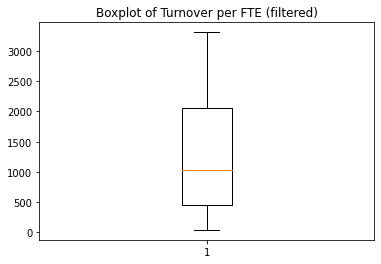

Number of excluded values: 0


In [65]:
# Subset the dataframe with the 50 smallest values
smallest_50 = df.nsmallest(50, 'turnover_per_FTE')

# Calculate mean and standard deviation
mean = np.mean(smallest_50['turnover_per_FTE'])
std = np.std(smallest_50['turnover_per_FTE'])

# Define a threshold for excluding small values
threshold = mean - 2 * std  # Example: 2 standard deviations below the mean

# Exclude data points with very small values
filtered_data = smallest_50[smallest_50['turnover_per_FTE'] >= threshold]

# Visualize filtered data (optional)
import matplotlib.pyplot as plt

plt.boxplot(filtered_data['turnover_per_FTE'])
plt.title('Boxplot of Turnover per FTE (filtered)')
plt.show()

# Exclude the filtered data points from the original dataset
df = df[~df.index.isin(filtered_data.index)]
# Calculate the number of excluded values
excluded_count = len(smallest_50) - len(filtered_data)

# Print the number of excluded values
print("Number of excluded values:", excluded_count)

In [66]:
print(df['turnover_per_FTE'].sort_values())
print(df.shape)

252       3463.41
164       3901.10
234       4000.00
182       4000.00
371       4000.00
          ...    
341    4086500.00
388    4339500.00
41     5382000.00
8      8124000.00
4      8303000.00
Name: turnover_per_FTE, Length: 339, dtype: float64
(339, 58)


In [67]:
print(df['What was your firm’s turnover in the last calendar year? (in €)'].head())

0     209000
1    1860000
2    4278000
3    6556000
4    8303000
Name: What was your firm’s turnover in the last calendar year? (in €), dtype: int64


In [68]:
# Descriptive statistics of the dependent variable
dep_var_stats = df['What was your firm’s turnover in the last calendar year? (in €)'].describe()
print(dep_var_stats)

count    3.390000e+02
mean     2.481897e+06
std      2.335351e+06
min      2.100000e+04
25%      7.750000e+05
50%      1.541000e+06
75%      3.503500e+06
max      9.947000e+06
Name: What was your firm’s turnover in the last calendar year? (in €), dtype: float64


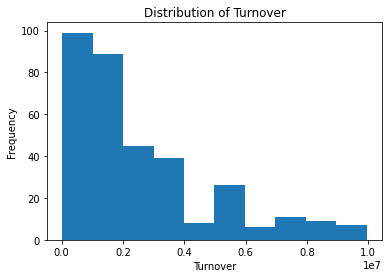

In [69]:
# Histogram of the dependent variable
plt.hist(df['What was your firm’s turnover in the last calendar year? (in €)'], bins=10)
plt.xlabel('Turnover')
plt.ylabel('Frequency')
plt.title('Distribution of Turnover')
plt.show()

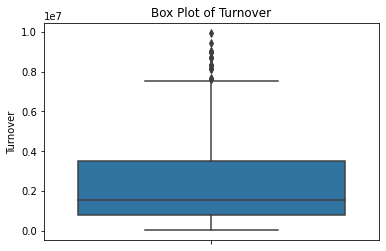

In [70]:
# Box plot of the dependent variable
sns.boxplot(y='What was your firm’s turnover in the last calendar year? (in €)', data=df)
plt.ylabel('Turnover')
plt.title('Box Plot of Turnover')
plt.show()

In [71]:
df['log_turnover'] = np.log(df['What was your firm’s turnover in the last calendar year? (in €)'] + 1)  # Adding 1 to avoid issues with zero values

# Verify the transformation
print(df['log_turnover'])

0      12.250094
1      14.436088
2      15.268996
3      15.695891
4      15.932128
         ...    
384    15.425748
385    14.180154
386    14.873648
387    15.053885
388    15.976417
Name: log_turnover, Length: 339, dtype: float64


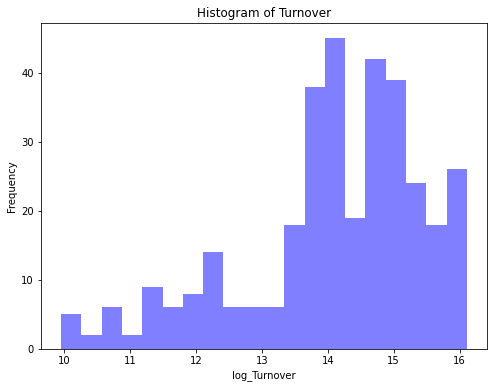

In [72]:
# Checking normality of the dependent variable (turnover)
plt.figure(figsize=(8, 6))
plt.hist(df['log_turnover'], bins=20, color='blue', alpha=0.5)
plt.xlabel('log_Turnover')
plt.ylabel('Frequency')
plt.title('Histogram of Turnover')
plt.show()

In [73]:
#indepedent variables creation 
df['avg_inv'] = df[['Your primary involvement with data is in entering data', 'Your primary involvement with data is in preparing visualizations', 'Your primary/major involvement with data is in understanding what happened in past or what is happening', 'Your primary/major involvement with data is in using data to predict what may happen']].mean(axis=1)
print(df['avg_inv'])
df['avg_inf'] = df[['My organization has central warehouse to store all data', 'My organization has one point of contact for all database related queries', 'My organization has one point of contact for all data analysis related queries', 'We have access to cloud computing platform (Azure/AWS/GCP/Digital Ocean)']].mean(axis=1)
print(df['avg_inf'])
df['avg_tools'] = df[['Extent to which spreadsheets (Excel/Libreoffice Cal/gnumeric etc.) are used in the organization', 'Extent to which prepreitory mathematical/statistical softwares (Matlab/SPSS etc.) are used in the organization', 'Extent to which statistical programming languages (R/Python/Scala) are used in the organization', 'Extent to which data visualization softwares (PowerBI/Tableau/Periscope etc.) are used in your organization']].mean(axis=1)
print(df['avg_tools'])
df['avg_open'] = df[['My organization is cooperating with external parties in the area of data.', 'The distance between data specialists and other staff is small.', 'Making mistakes in analyzing data is used to learn and improve', 'My organization stimulates experiments with new technology.', 'My organization shares data with other parties.']].mean(axis=1)
print(df['avg_open'])
df['avg_ds'] = df[['My organization uses product/service sales data', 'My organization uses financial data', 'My organization uses customer data (orders/subscriptions etc.)', 'My organization uses employee data']].mean(axis=1)
print(df['avg_ds'])
df['avg_comp'] = df[['There are plenty of opportunities to develop data skills', 'The management is aware of the possibilities of data', 'New (data) technologies are introduced quickly and smoothly', 'Support with problems related to data are well arranged']].mean(axis=1)
print(df['avg_comp'])
df['avg_dq'] = df[['I am confident that the data is relevant within my organization', 'I am confident that the data within my organization is accurate', 'I am confident that the data within my organization is up to date / recent', 'I am confident that the data within my organization is complete']].mean(axis=1)
print(df['avg_dq'])
df['avg_inn'] = df[['My organization strives for the rapid adoption of novelties in the field of data', 'My colleagues often bring new ideas and developments in the field of data to the table', 'The leadership is keen to capitalize on new developments in data immediately', 'Promising developments regarding data are quickly addressed', 'My organization has the resources and opportunities to quickly implement new developments']].mean(axis=1)
print(df['avg_inn'])
df['avg_safe'] = df[['Within my organization everyone uses the same software (Microsoft Office, Salesforce, Microsoft Dynamics, etc.)', 'My organization is aware of the importance of data security']].mean(axis=1)
print(df['avg_safe'])
df['avg_priv'] = df[['Within my organization, awareness of data ethics and privacy is highly developed', 'My organization is aware of the law and regulations regarding data (e.g. the GDPR)']].mean(axis=1)
print(df['avg_priv'])
df['avg_cult'] = df[['I have the resources to work on data-related projects in addition to my normal tasks', 'I know how to find help online for solving data-related issues (e.g. on forums or discussion groups)']].mean(axis=1)
print(df['avg_cult'])
df['avg_know'] = df[['What is your knowledge level of data visualization tools?', 'What is your knowledge level of Structured Query Language (SQL or similar)', 'What is your knowledge level of Application Prgramming Interface (API)', 'What is your knowledge level of file sharing services (Dropbox/onedrive etc.)', 'What is your knowledge level of artificial intelligence (reinforment learning)']].mean(axis=1)
print(df['avg_know'])
df['avg_soc'] = df[['When new data becomes available, I immediately use it to revise my position', 'I always strictly adhere to the applicable laws and regulations regarding data (e.g. the GDPR)']].mean(axis=1)
print(df['avg_soc'])
df['self_asses'] = df['Based on these five levels of data maturity, how would you rate your organization?'] 

0      2.25
1      1.00
2      1.25
3      4.50
4      4.00
       ... 
384    1.50
385    1.25
386    1.75
387    1.25
388    2.00
Name: avg_inv, Length: 339, dtype: float64
0      3.75
1      3.75
2      3.75
3      4.75
4      4.75
       ... 
384    1.75
385    2.25
386    2.00
387    2.00
388    2.50
Name: avg_inf, Length: 339, dtype: float64
0      3.25
1      3.75
2      3.25
3      3.50
4      3.75
       ... 
384    3.25
385    3.25
386    3.25
387    2.75
388    2.50
Name: avg_tools, Length: 339, dtype: float64
0      2.6
1      3.4
2      2.6
3      3.8
4      2.2
      ... 
384    4.0
385    4.0
386    4.2
387    3.0
388    3.6
Name: avg_open, Length: 339, dtype: float64
0      3.25
1      3.25
2      3.00
3      4.00
4      4.00
       ... 
384    3.50
385    4.25
386    3.00
387    3.75
388    2.25
Name: avg_ds, Length: 339, dtype: float64
0      3.50
1      1.75
2      3.75
3      3.25
4      3.50
       ... 
384    3.25
385    3.00
386    3.50
387    3.50
388    3.00
Na

In [74]:
columns_to_exclude = ['Your primary involvement with data is in entering data', 'Your primary involvement with data is in preparing visualizations', 'Your primary/major involvement with data is in understanding what happened in past or what is happening', 'Your primary/major involvement with data is in using data to predict what may happen', 
'My organization has central warehouse to store all data', 'My organization has one point of contact for all database related queries', 'My organization has one point of contact for all data analysis related queries', 'We have access to cloud computing platform (Azure/AWS/GCP/Digital Ocean)', 
'Extent to which spreadsheets (Excel/Libreoffice Cal/gnumeric etc.) are used in the organization', 'Extent to which prepreitory mathematical/statistical softwares (Matlab/SPSS etc.) are used in the organization', 'Extent to which statistical programming languages (R/Python/Scala) are used in the organization', 'Extent to which data visualization softwares (PowerBI/Tableau/Periscope etc.) are used in your organization', 
'My organization is cooperating with external parties in the area of data.', 'The distance between data specialists and other staff is small.', 'Making mistakes in analyzing data is used to learn and improve', 'My organization stimulates experiments with new technology.', 'My organization shares data with other parties.', 
'My organization uses product/service sales data', 'My organization uses financial data', 'My organization uses customer data (orders/subscriptions etc.)', 'My organization uses employee data', 
'There are plenty of opportunities to develop data skills', 'The management is aware of the possibilities of data', 'New (data) technologies are introduced quickly and smoothly', 'Support with problems related to data are well arranged', 
'I am confident that the data is relevant within my organization', 'I am confident that the data within my organization is accurate', 'I am confident that the data within my organization is up to date / recent', 'I am confident that the data within my organization is complete', 
'My organization strives for the rapid adoption of novelties in the field of data', 'My colleagues often bring new ideas and developments in the field of data to the table', 'The leadership is keen to capitalize on new developments in data immediately', 'Promising developments regarding data are quickly addressed', 'My organization has the resources and opportunities to quickly implement new developments', 
'Within my organization everyone uses the same software (Microsoft Office, Salesforce, Microsoft Dynamics, etc.)', 'My organization is aware of the importance of data security', 
'Within my organization, awareness of data ethics and privacy is highly developed', 'My organization is aware of the law and regulations regarding data (e.g. the GDPR)',
'I have the resources to work on data-related projects in addition to my normal tasks', 'I know how to find help online for solving data-related issues (e.g. on forums or discussion groups)', 
'What is your knowledge level of data visualization tools?', 'What is your knowledge level of Structured Query Language (SQL or similar)', 'What is your knowledge level of Application Prgramming Interface (API)', 'What is your knowledge level of file sharing services (Dropbox/onedrive etc.)', 'What is your knowledge level of artificial intelligence (reinforment learning)', 
'When new data becomes available, I immediately use it to revise my position', 'I always strictly adhere to the applicable laws and regulations regarding data (e.g. the GDPR)', 
'Based on these five levels of data maturity, how would you rate your organization?']
df = df.drop(columns=columns_to_exclude)






In [75]:
print(df.columns)

Index(['My age', 'My highest education',
       'In my function I carry managerial responsibility (executive, end responsible, partner)',
       'My enterprise is active in the following branche/industry',
       'Please indicate your company`s age in years',
       'How many FTE are in your organization?',
       'What was your firm’s turnover in the last calendar year? (in €)',
       'How much time do you spend on average per day working with data in your current role?',
       'sector_new', 'turnover_per_FTE', 'log_turnover', 'avg_inv', 'avg_inf',
       'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn',
       'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc',
       'self_asses'],
      dtype='object')


In [76]:
indpendent_vars = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses']

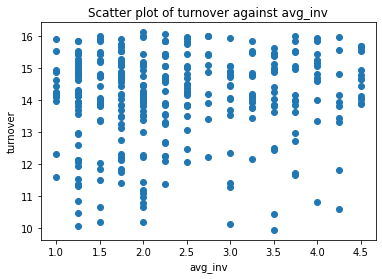

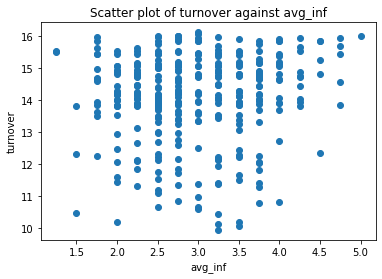

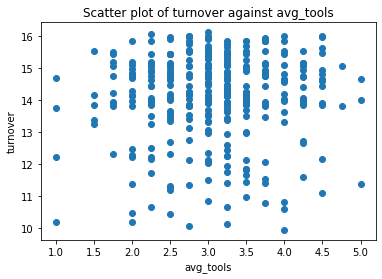

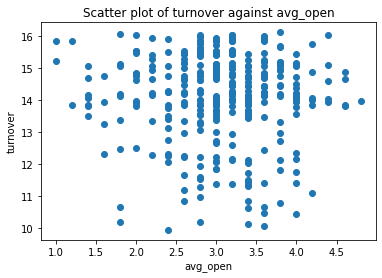

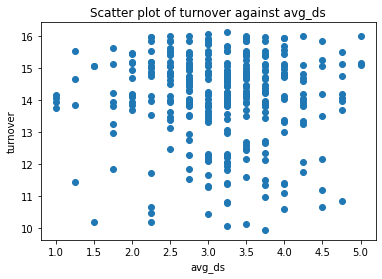

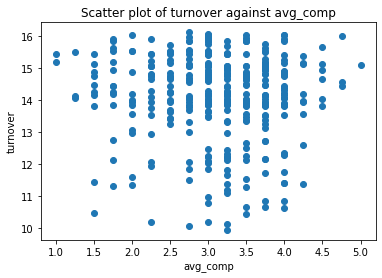

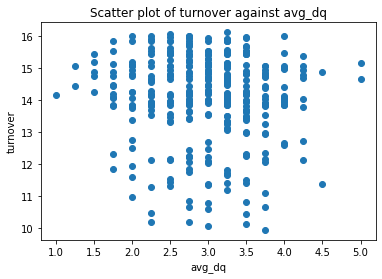

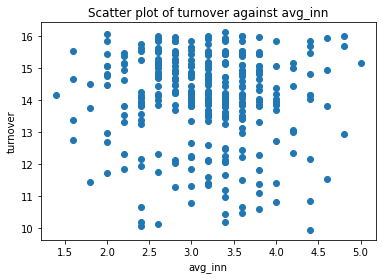

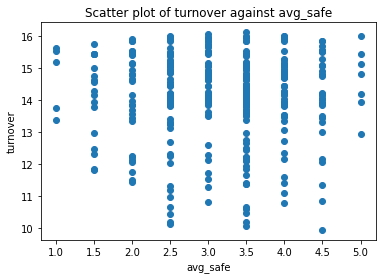

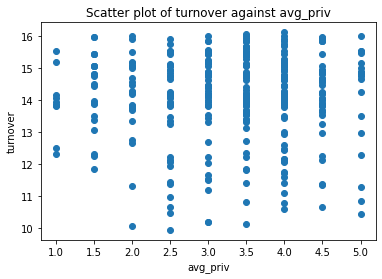

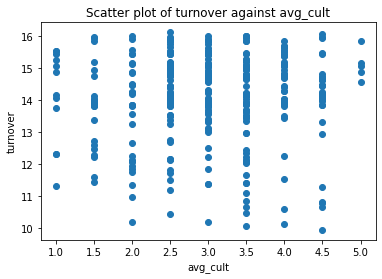

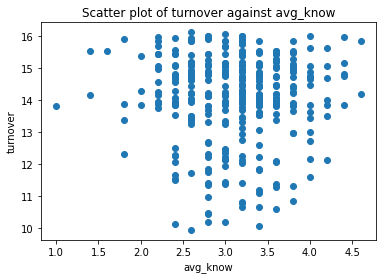

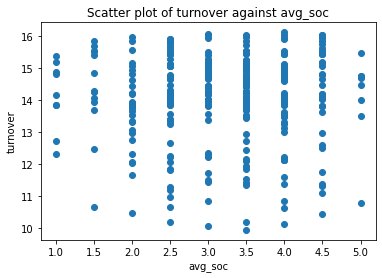

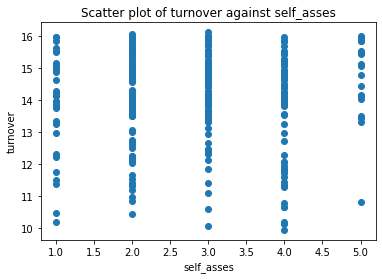

In [77]:
for var in indpendent_vars:
    # Create a scatter plot of the dependent variable against the current independent variable
    plt.scatter(df[var], df['log_turnover'])
    plt.xlabel(var)
    plt.ylabel('turnover')
    plt.title(f'Scatter plot of turnover against {var}')
    plt.show()

In [78]:
correlation_matrix = df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses']].corr()
print(correlation_matrix)

             avg_inv   avg_inf  avg_tools  avg_open    avg_ds  avg_comp  \
avg_inv     1.000000  0.265589   0.199013  0.073492  0.095456  0.148719   
avg_inf     0.265589  1.000000   0.230341  0.146036  0.234814  0.178116   
avg_tools   0.199013  0.230341   1.000000  0.500643  0.319941  0.107314   
avg_open    0.073492  0.146036   0.500643  1.000000  0.342461  0.122808   
avg_ds      0.095456  0.234814   0.319941  0.342461  1.000000  0.416071   
avg_comp    0.148719  0.178116   0.107314  0.122808  0.416071  1.000000   
avg_dq      0.193191  0.131984   0.181585  0.105177  0.264096  0.480939   
avg_inn     0.186366  0.136676   0.294208  0.211790  0.405531  0.258716   
avg_safe   -0.005914  0.161441   0.156703  0.183630  0.336788  0.144216   
avg_priv    0.152377  0.211168   0.251321  0.199575  0.409206  0.282890   
avg_cult    0.286329  0.310109   0.202234  0.119174  0.286084  0.313314   
avg_know   -0.072679 -0.006737   0.284788  0.226535  0.217543  0.057773   
avg_soc     0.005916  0.0

In [79]:


X = df[['avg_inv', 'avg_inf', 'avg_tools', 'avg_open',
       'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn', 'avg_safe', 'avg_priv',
       'avg_cult', 'avg_know', 'avg_soc', 'self_asses']]
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Feature        VIF
0      avg_inv   8.475254
1      avg_inf  22.002643
2    avg_tools  26.352197
3     avg_open  27.602076
4       avg_ds  29.943786
5     avg_comp  25.668618
6       avg_dq  29.676868
7      avg_inn  35.030762
8     avg_safe  17.737435
9     avg_priv  16.901048
10    avg_cult  16.108210
11    avg_know  35.660010
12     avg_soc  18.307675
13  self_asses  11.894679


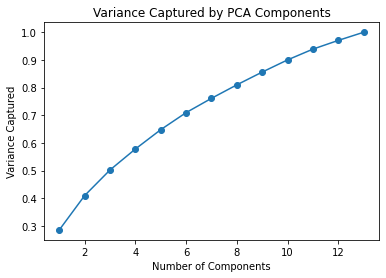

PCA Features:
PCA_1: 28.59%
PCA_2: 12.41%
PCA_3: 9.25%
PCA_4: 7.57%
PCA_5: 6.99%
PCA_6: 6.16%
PCA_7: 5.16%
PCA_8: 4.87%
PCA_9: 4.61%
PCA_10: 4.40%

New Dataframe with PCA Features:
      PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0 -0.067938 -1.938940 -0.435534  0.089356 -0.205231 -1.445999  1.025864   
1  0.731671  2.236217 -1.863039 -1.873325 -0.892319 -1.101064  0.896537   
2 -0.519577  0.116712  0.578197 -1.150329 -0.700234 -0.963445 -1.099488   
3 -2.749203 -1.942856 -2.229768 -2.268279 -0.049514  1.763710  0.165045   
4 -2.466312 -1.824844 -0.673015 -0.517526 -1.406771 -0.354104  0.054618   

      PCA_8     PCA_9    PCA_10  log_turnover  \
0 -0.695350 -0.138313 -0.169144     12.250094   
1 -0.534885  0.032112 -0.476540     14.436088   
2 -0.845992  0.297626 -0.302745     15.268996   
3 -0.026625 -0.275370  0.115428     15.695891   
4  1.086622 -1.434060 -0.881809     15.932128   

   My enterprise is active in the following branche/industry  \
0        

In [80]:


# Define the column names for the independent variables
independent_columns = ['avg_inv', 'avg_inf', 'avg_tools', 'avg_open', 'avg_ds', 'avg_comp', 'avg_dq', 'avg_inn',
                       'avg_safe', 'avg_priv', 'avg_cult', 'avg_know', 'avg_soc']

# Define the column names for the dependent variable and control variables
dependent_column = 'log_turnover'
control_columns = ['My enterprise is active in the following branche/industry',
                   'Please indicate your company`s age in years',
                   'How many FTE are in your organization?']

# Create a new dataframe with the independent, dependent, and control variables
df_selected = df[independent_columns + [dependent_column] + control_columns].copy().reset_index(drop=True)

# Standardize the independent variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_selected[independent_columns])

# Perform PCA for different component numbers
component_numbers = range(1, 14)
variance_captured = []
for n in component_numbers:
    pca = PCA(n_components=n)
    pca_features = pca.fit_transform(df_scaled)
    variance_captured.append(np.sum(pca.explained_variance_ratio_))

# Plot the captured variance
plt.plot(component_numbers, variance_captured, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Variance Captured')
plt.title('Variance Captured by PCA Components')
plt.show()

# Perform PCA
pca = PCA(n_components=10)
pca_features = pca.fit_transform(df_scaled)


# Create a new dataframe with PCA features, dependent variable, and control variables
df_pca = pd.DataFrame(pca_features, columns=['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10'])
df_pca = pd.concat([df_pca, df_selected[[dependent_column] + control_columns]], axis=1)

# Print the result of PCA features and their contributions
print("PCA Features:")
for i, feature in enumerate(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']):
    print(f"{feature}: {pca.explained_variance_ratio_[i] * 100:.2f}%")

# Print the new dataframe with PCA features, dependent variable, and control variables
print("\nNew Dataframe with PCA Features:")
print(df_pca.head())


In [81]:
df_pca

,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,log_turnover,My enterprise is active in the following branche/industry,Please indicate your company`s age in years,How many FTE are in your organization?
0,-0.067938,-1.938940,-0.435534,0.089356,-0.205231,-1.445999,1.025864,-0.695350,-0.138313,-0.169144,12.250094,73,3,36
1,0.731671,2.236217,-1.863039,-1.873325,-0.892319,-1.101064,0.896537,-0.534885,0.032112,-0.476540,14.436088,43,18,96
2,-0.519577,0.116712,0.578197,-1.150329,-0.700234,-0.963445,-1.099488,-0.845992,0.297626,-0.302745,15.268996,41,13,18
3,-2.749203,-1.942856,-2.229768,-2.268279,-0.049514,1.763710,0.165045,-0.026625,-0.275370,0.115428,15.695891,26,11,80
4,-2.466312,-1.824844,-0.673015,-0.517526,-1.406771,-0.354104,0.054618,1.086622,-1.434060,-0.881809,15.932128,93,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,-0.756768,0.864550,0.613920,1.211747,1.139451,-0.620164,1.728123,-0.255173,0.375838,0.614211,15.425748,45,13,5
335,-1.046967,1.697433,0.517853,-0.479293,1.348774,-0.046936,0.907281,-0.143338,0.352274,-0.144549,14.180154,46,26,25
336,-1.243113,1.444742,0.633976,0.722863,0.687782,-0.155802,0.839600,-0.450275,1.378509,-0.437027,14.873648,23,16,65
337,0.243234,0.707233,0.920285,-1.947353,0.821841,1.401292,0.005507,-0.532289,0.349648,2.409594,15.053885,23,108,6


In [82]:
print(df_pca.columns)

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10', 'log_turnover',
       'My enterprise is active in the following branche/industry',
       'Please indicate your company`s age in years',
       'How many FTE are in your organization?'],
      dtype='object')


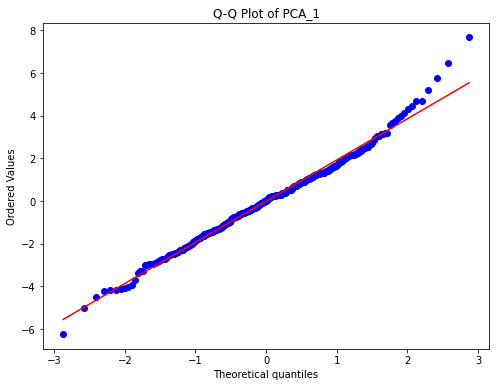

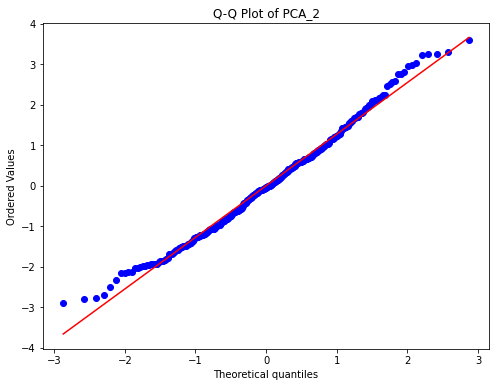

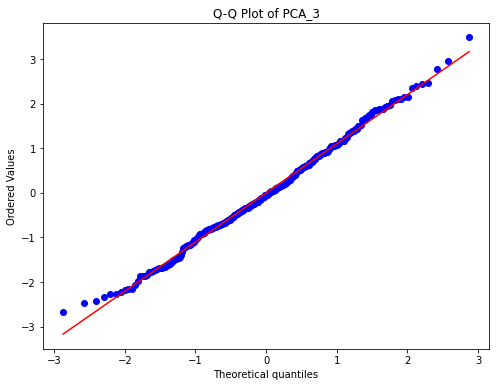

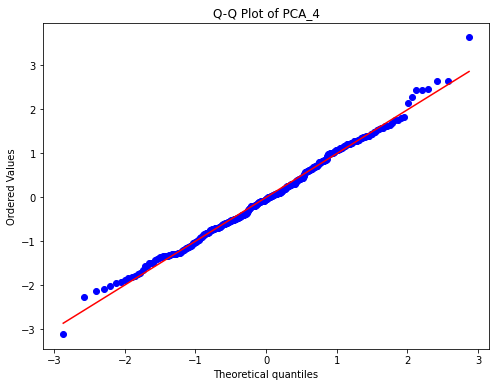

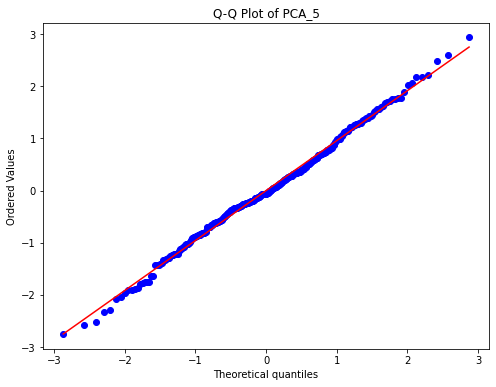

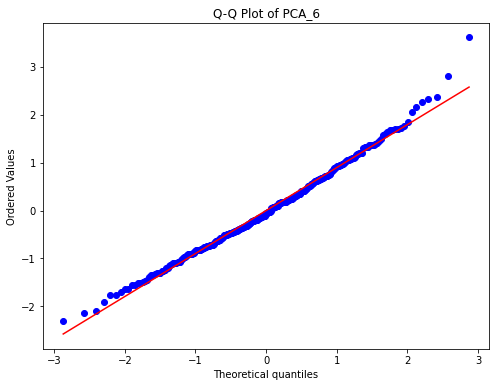

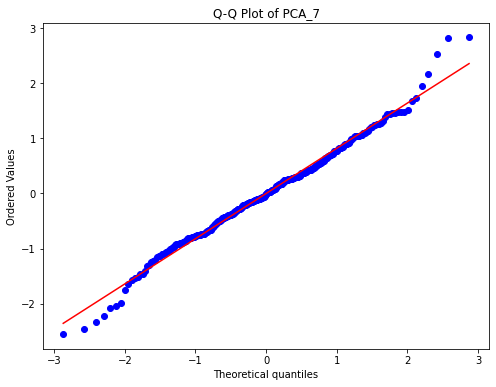

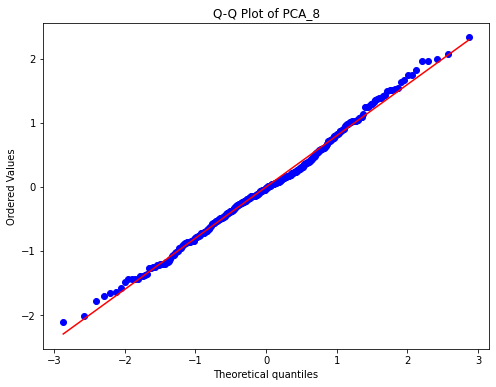

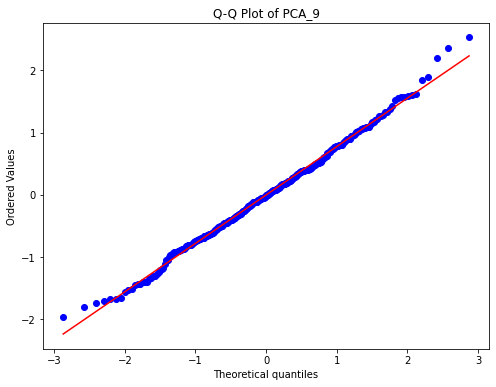

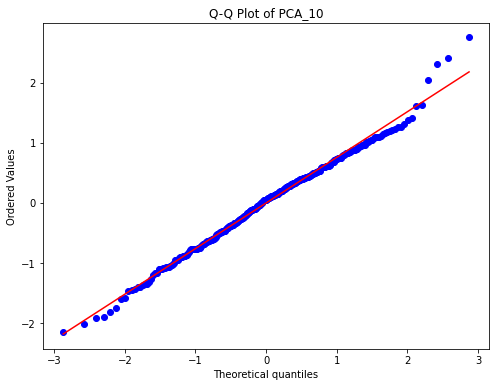

Shapiro-Wilk test for PCA_1: p-value = 0.022309480234980583
Shapiro-Wilk test for PCA_2: p-value = 0.015703411772847176
Shapiro-Wilk test for PCA_3: p-value = 0.42563512921333313
Shapiro-Wilk test for PCA_4: p-value = 0.247165709733963
Shapiro-Wilk test for PCA_5: p-value = 0.4715109169483185
Shapiro-Wilk test for PCA_6: p-value = 0.03868185356259346
Shapiro-Wilk test for PCA_7: p-value = 0.020095616579055786
Shapiro-Wilk test for PCA_8: p-value = 0.2551339268684387
Shapiro-Wilk test for PCA_9: p-value = 0.48940223455429077
Shapiro-Wilk test for PCA_10: p-value = 0.09736083447933197


In [83]:
# Checking normality of PCA features using Q-Q plots
pca_features = ['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']  

for var in pca_features:
    plt.figure(figsize=(8, 6))
    stats.probplot(df_pca[var], dist='norm', plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    plt.show()

# Checking normality of PCA features using Shapiro-Wilk test
for var in pca_features:
    stat, p = stats.shapiro(df_pca[var])
    print(f'Shapiro-Wilk test for {var}: p-value = {p}')

In [84]:
column_names = {'My enterprise is active in the following branche/industry': 'Industry',
                'Please indicate your company`s age in years': 'Age',
                'How many FTE are in your organization?': 'FTE'}

# Rename the columns using the rename() function
df_pca = df_pca.rename(columns=column_names)

# Print the updated DataFrame
print(df_pca.columns)

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10', 'log_turnover', 'Industry', 'Age', 'FTE'],
      dtype='object')


In [85]:
# Define the encoding dictionary
sector_encoding = {
    1: 'Agriculture',
    8: 'Mining',
    10: 'Manufacturing',
    11: 'Manufacturing',
    13: 'Manufacturing',
    14: 'Manufacturing',
    16: 'Manufacturing',
    17: 'Manufacturing',
    18: 'Manufacturing',
    20: 'Manufacturing',
    21: 'Manufacturing',
    22: 'Manufacturing',
    23: 'Manufacturing',
    24: 'Manufacturing',
    25: 'Manufacturing',
    26: 'Manufacturing',
    27: 'Manufacturing',
    28: 'Manufacturing',
    29: 'Manufacturing',
    30: 'Manufacturing',
    31: 'Manufacturing',
    32: 'Manufacturing',
    35: 'Electricity',
    36: 'Water_supply',
    38: 'Water_supply',
    41: 'Construction',
    42: 'Construction',
    43: 'Construction',
    45: 'Wholesale_retail',
    46: 'Wholesale_retail',
    47: 'Wholesale_retail',
    49: 'Transportation_storage',
    52: 'Transportation_storage',
    55: 'Accommodation',
    56: 'Accommodation',
    58: 'IT',
    61: 'IT',
    62: 'IT',
    63: 'IT',
    64: 'Finance',
    66: 'Finance',
    68: 'Real_estate',
    69: 'Consultancy',
    70: 'Consultancy',
    71: 'Consultancy',
    73: 'Consultancy',
    77: 'Renting',
    81: 'Renting',
    82: 'Renting',
    84: 'Public_administration',
    85: 'Public_administration',
    86: 'Healthcare',
    87: 'Healthcare',
    88: 'Healthcare',
    90: 'Culture',
    91: 'Culture',
    93: 'Culture',
    94: 'Other',
    96: 'Other'
}

# Add the 'sector' column based on the encoding
df_pca['sector'] = df_pca['Industry'].map(sector_encoding)

In [86]:
print(df_pca.columns)

Index(['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10', 'log_turnover', 'Industry', 'Age', 'FTE', 'sector'],
      dtype='object')


In [87]:


# Create a new DataFrame with the dependent and independent variables
df_model = pd.DataFrame({'log_turnover': df_pca['log_turnover'], 'PCA_1': df_pca['PCA_1'],
                         'PCA_2': df_pca['PCA_2'], 'PCA_3': df_pca['PCA_3'],
                         'PCA_4': df_pca['PCA_4'], 'PCA_5': df_pca['PCA_5'],
                         'PCA_6': df_pca['PCA_6'], 'PCA_7': df_pca['PCA_7'],
                         'PCA_8': df_pca['PCA_8'], 'PCA_9': df_pca['PCA_9'],
                         'PCA_10': df_pca['PCA_10']})

# Specify the independent variables and the constant term
X = df_model[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']]
X = sm.add_constant(X)  # Add constant term

# Specify the dependent variable
y = df_model['log_turnover']

# Fit the multiple regression model with imputed data
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.8394
Date:                Wed, 28 Jun 2023   Prob (F-statistic):              0.591
Time:                        15:03:17   Log-Likelihood:                -584.91
No. Observations:                 339   AIC:                             1192.
Df Residuals:                     328   BIC:                             1234.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.0947      0.075    187.889      0.0

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [88]:
# Encode 'Industry' variable using effect coding
industry_effects = pd.get_dummies(df_pca['sector'], drop_first=True).apply(lambda x: x - x.mean())
df_encoded = pd.concat([df_pca, industry_effects], axis=1)

# Define the independent variables and the dependent variable
X_pca = df_pca[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8',
       'PCA_9', 'PCA_10']]
X_controls = df_encoded[['Age', 'FTE'] + list(industry_effects.columns)]
X = pd.concat([X_pca, X_controls], axis=1)
y = df_pca['log_turnover']

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     1.827
Date:                Wed, 28 Jun 2023   Prob (F-statistic):            0.00776
Time:                        15:03:21   Log-Likelihood:                -563.31
No. Observations:                 339   AIC:                             1185.
Df Residuals:                     310   BIC:                             1296.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     13

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [89]:
# Define the dependent variable
y = df_pca['log_turnover']

# Define the independent variables (PCA variables)
X = df_pca[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5','PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']]

X_controls = df_encoded[['Age', 'FTE'] + list(industry_effects.columns)]
X = pd.concat([X_pca, X_controls], axis=1)

# Add a column of 1s for the intercept term
X = sm.add_constant(X)

# Include the interaction terms between PCA variables and AGE
X['PCA1_AGE_interaction'] = X['Age'] * X['PCA_1']
X['PCA2_AGE_interaction'] = X['Age'] * X['PCA_2']
X['PCA3_AGE_interaction'] = X['Age'] * X['PCA_3']
X['PCA4_AGE_interaction'] = X['Age'] * X['PCA_4']
X['PCA5_AGE_interaction'] = X['Age'] * X['PCA_5']
X['PCA6_AGE_interaction'] = X['Age'] * X['PCA_6']
X['PCA7_AGE_interaction'] = X['Age'] * X['PCA_7']
X['PCA8_AGE_interaction'] = X['Age'] * X['PCA_8']
X['PCA9_AGE_interaction'] = X['Age'] * X['PCA_9']
X['PCA10_AGE_interaction'] = X['Age'] * X['PCA_10']
# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.661
Date:                Wed, 28 Jun 2023   Prob (F-statistic):             0.0113
Time:                        15:03:26   Log-Likelihood:                -556.83
No. Observations:                 339   AIC:                             1192.
Df Residuals:                     300   BIC:                             1341.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     13

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [90]:
# Define the dependent variable
y = df_pca['log_turnover']

# Define the independent variables (PCA variables)
X = df_pca[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']]

X_controls = df_encoded[['Age', 'FTE'] + list(industry_effects.columns)]
X = pd.concat([X_pca, X_controls], axis=1)
# Add a column of 1s for the intercept term
X = sm.add_constant(X)

# Include the interaction terms between PCA variables and AGE
X['PCA1_FTE_interaction'] = X['FTE'] * X['PCA_1']
X['PCA2_FTE_interaction'] = X['FTE'] * X['PCA_2']
X['PCA3_FTE_interaction'] = X['FTE'] * X['PCA_3']
X['PCA4_FTE_interaction'] = X['FTE'] * X['PCA_4']
X['PCA5_FTE_interaction'] = X['FTE'] * X['PCA_5']
X['PCA6_FTE_interaction'] = X['FTE'] * X['PCA_6']
X['PCA7_FTE_interaction'] = X['FTE'] * X['PCA_7']
X['PCA8_FTE_interaction'] = X['FTE'] * X['PCA_8']
X['PCA9_FTE_interaction'] = X['FTE'] * X['PCA_9']
X['PCA10_FTE_interaction'] = X['FTE'] * X['PCA_10']

# Fit the regression model
model = sm.OLS(y, X)
results = model.fit()

# Print the summary statistics
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     1.401
Date:                Wed, 28 Jun 2023   Prob (F-statistic):             0.0662
Time:                        15:03:31   Log-Likelihood:                -561.51
No. Observations:                 339   AIC:                             1201.
Df Residuals:                     300   BIC:                             1350.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     13

c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [91]:
# Encode company industry using dummy variables
df_encoded = pd.get_dummies(df_pca, columns=['sector'], drop_first=True)

# Define the dependent variable
y = df_encoded['log_turnover']

# Define the independent variables (PCA variables)
X = df_encoded[['PCA_1', 'PCA_2', 'PCA_3', 'PCA_4', 'PCA_5', 'PCA_6', 'PCA_7', 'PCA_8', 'PCA_9', 'PCA_10']]
X_controls = df_encoded[['Age', 'FTE']]
X = pd.concat([X_pca, X_controls], axis=1)
# Add a column of 1s for the intercept term
X = sm.add_constant(X)

# Create a list of industry columns
industry_columns = [column for column in df_encoded.columns if column.startswith('sector_')]

# Loop through each industry column and each independent variable
for industry_column in industry_columns:
    # Extract the industry name from the column
    industry = industry_column.replace('sector_', '')
    
    # Add the industry column to the independent variables
    X_with_industry = X.copy()
    X_with_industry[industry_column] = df_encoded[industry_column]
    
    # Include the interaction terms between PCA variables and the current industry
    X_interactions = X_with_industry.copy()
    for pca_column in X.columns:
        if pca_column.startswith('PCA_'):
            interaction_column = f'{pca_column}_{industry}_interaction'
            X_interactions[interaction_column] = X_with_industry[pca_column] * X_with_industry[industry_column]
    
    # Fit the regression model
    model = sm.OLS(y, X_interactions)
    results = model.fit()

    # Print the summary statistics for the current industry
    print(f"Industry: {industry}")
    print(results.summary())
    print("\n")


c:\Users\OEM\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Industry: Agriculture
                            OLS Regression Results                            
Dep. Variable:           log_turnover   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     2.065
Date:                Wed, 28 Jun 2023   Prob (F-statistic):             0.0159
Time:                        15:03:36   Log-Likelihood:                -575.74
No. Observations:                 339   AIC:                             1179.
Df Residuals:                     325   BIC:                             1233.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------